In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_table('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt')

In [3]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [5]:
data.dtypes.value_counts()

float64    3
object     2
int64      2
dtype: int64

In [6]:
data.describe()[['mass', 'width', 'height','color_score']]

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

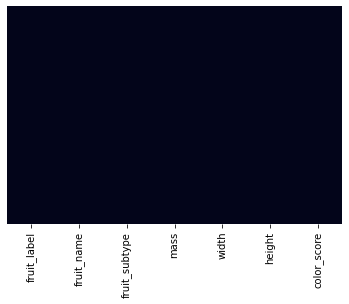

In [7]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

data.isnull().sum()

## EDA

In [8]:
sns.set_theme(style="whitegrid")

### Univariate Analysis

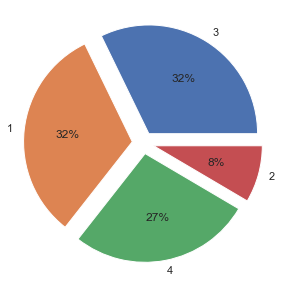

In [9]:
plt.figure(figsize=(12,5))

plt.pie(x = data['fruit_label'].value_counts().values, 
        explode = (0.1,0.1,0.1,0.1),
        autopct = '%1.0f%%',
        labels = data['fruit_label'].value_counts().index)

plt.show()

- the target labels are not evenly distributed with mandarin (2) being only 8%.

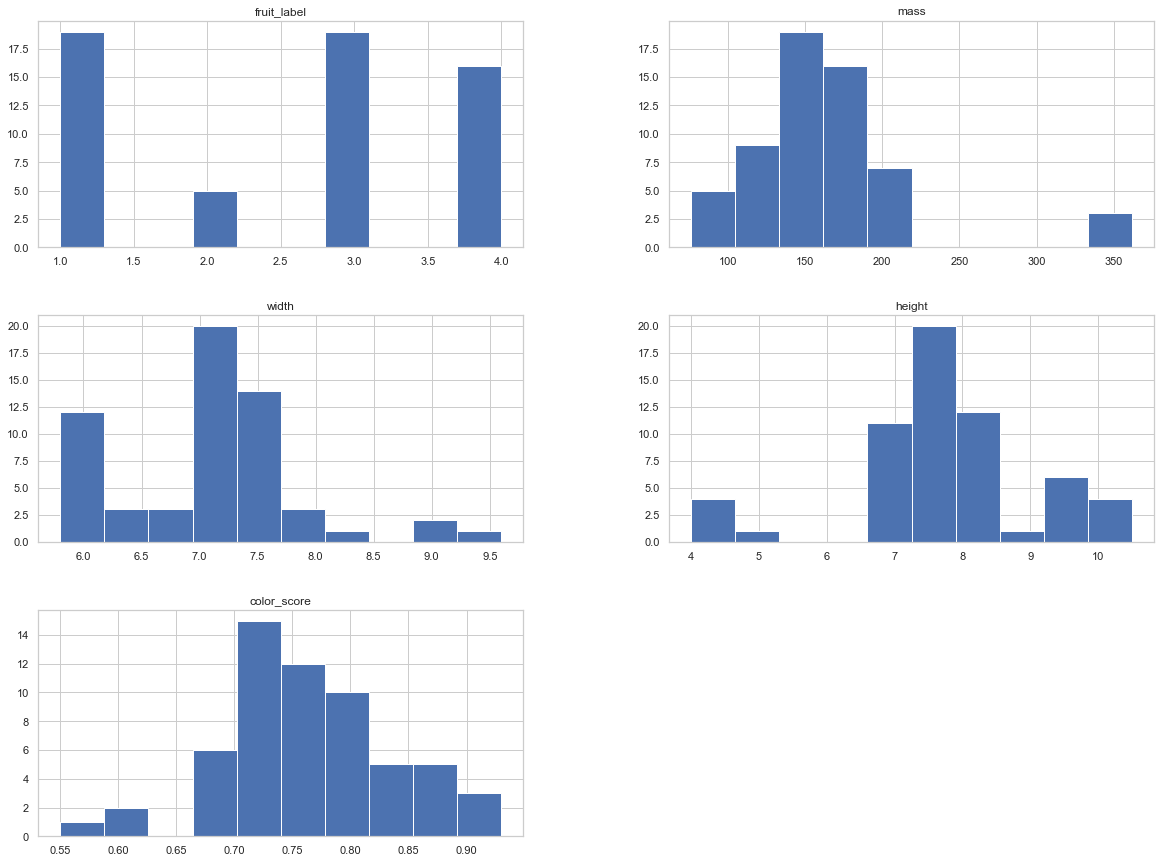

In [10]:
data.hist(bins=10, figsize=(20,15))
plt.show()

- 4 main features are **mass**, **width**, **height**, **color_score**.

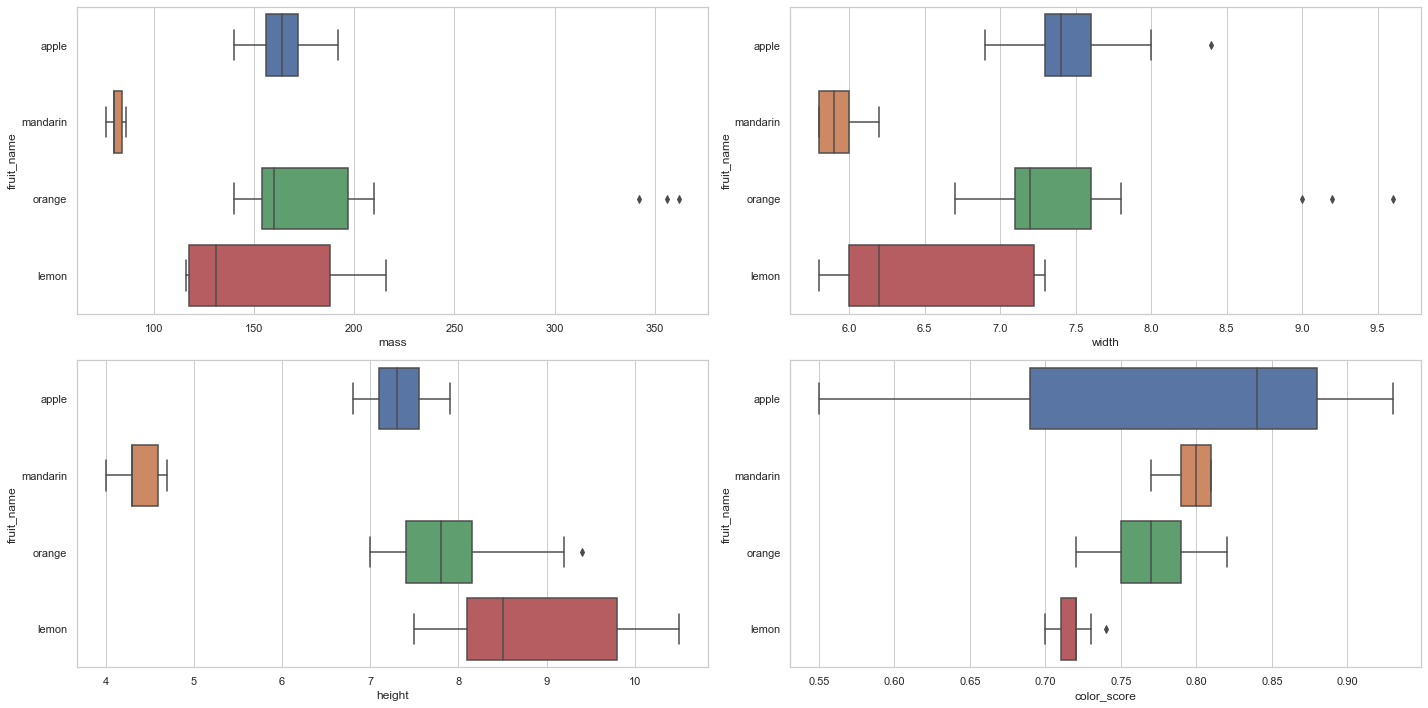

In [11]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

sns.boxplot(x='mass', y='fruit_name', data=data, ax=axes[0,0])
sns.boxplot(x='width', y='fruit_name', data=data, ax=axes[0,1])
sns.boxplot(x='height', y='fruit_name', data=data, ax=axes[1,0])
sns.boxplot(x='color_score', y='fruit_name', data=data, ax=axes[1,1])

plt.tight_layout()

- mandarin has the least **mass**, **widht** and **height**
- apple has a wide range of color 
- there are some outliers, mostly from orange and since it's small, we can try to remove it

In [12]:
data.groupby('fruit_name').mean()

,fruit_label,mass,width,height,color_score
fruit_name,,,,,
apple,1.0,165.052632,7.457895,7.342105,0.783684
lemon,4.0,150.000000,6.512500,8.856250,0.718125
mandarin,2.0,81.200000,5.940000,4.380000,0.796000
orange,3.0,193.789474,7.557895,7.936842,0.771053


## Bi-variate Analysis

<AxesSubplot:>

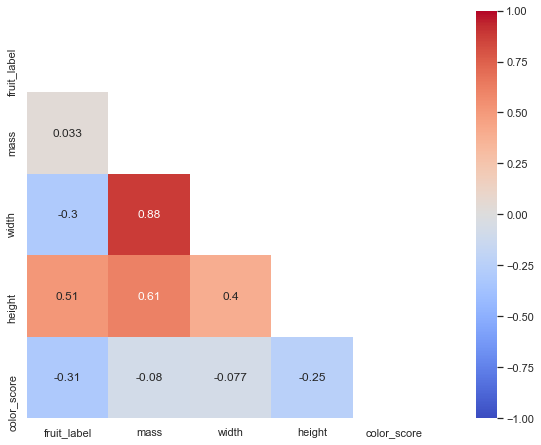

In [13]:
# correlation with each other
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(15,7.5))
sns.heatmap(data.corr(), mask=mask, annot=True,
            square=True, cmap='coolwarm', vmin=-1, vmax=1)

<AxesSubplot:>

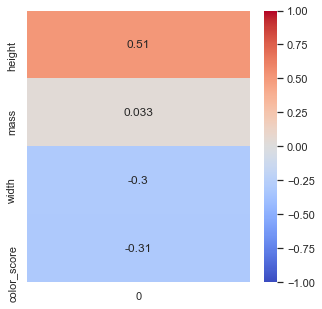

In [14]:
# correlation with target
correlation = data.corrwith(data['fruit_label']).iloc[1:].to_frame()

sort_correlation = correlation.sort_values(0, ascending=False)[0]

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(sort_correlation.to_frame(), cmap='coolwarm', annot=True, ax=ax, vmin=-1, vmax=1)

- **height** shows a positive correlation, **width** and **color_score** shows a negative correlation.

## Feature Engineering

In [15]:
data['area'] = data['height']*data['width']

<AxesSubplot:xlabel='area', ylabel='fruit_name'>

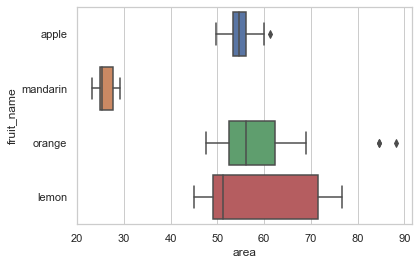

In [16]:
sns.boxplot(x='area', y='fruit_name', data=data)

- mandarin is the smallest in terms of **area**.

<AxesSubplot:>

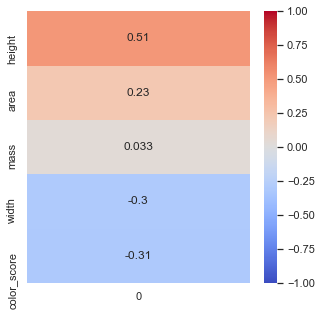

In [17]:
# new correlation with target
correlation = data.corrwith(data['fruit_label']).iloc[1:].to_frame()

sort_correlation = correlation.sort_values(0, ascending=False)[0]

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(sort_correlation.to_frame(), cmap='coolwarm', annot=True, ax=ax, vmin=-1, vmax=1)

## Data Preprocessing

In [18]:
# remove outlier
data_no_outlier = data.copy()

In [19]:
data_no_outlier[data_no_outlier['fruit_name']=='orange']['area'].sort_values()

28    47.57
39    50.32
32    50.40
29    51.80
42    51.84
40    53.25
30    53.25
37    53.29
36    53.96
35    56.09
38    56.16
34    59.28
33    60.75
41    62.32
31    62.40
27    69.00
24    84.60
25    84.64
26    88.32
Name: area, dtype: float64

In [20]:
data_no_outlier = data_no_outlier[data_no_outlier['area']<80]

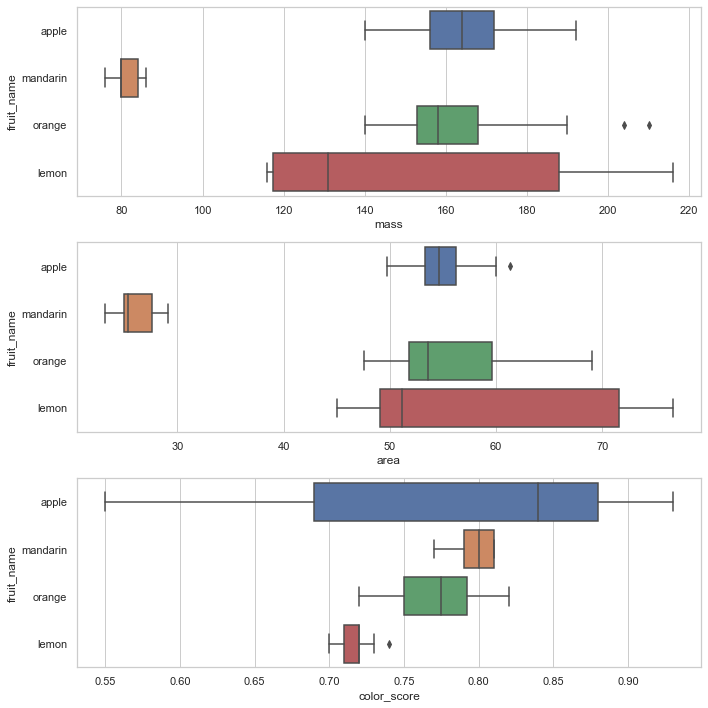

In [21]:
fig, axes = plt.subplots(3,1, figsize=(10,10))

sns.boxplot(x='mass', y='fruit_name', data=data_no_outlier, ax=axes[0])
sns.boxplot(x='area', y='fruit_name', data=data_no_outlier, ax=axes[1])
sns.boxplot(x='color_score', y='fruit_name', data=data_no_outlier, ax=axes[2])

plt.tight_layout()

In [22]:
X = data_no_outlier[['mass','area','color_score']]

y = data_no_outlier['fruit_label']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

- due to the small size of the data, the test size will be set to 20%.
- stratify parameter is used due to unbalanced target variable.

## Model Selection & Evaluation

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

In [25]:
models = []

models.append(('LogReg', LogisticRegression()))
models.append(('SGD', SGDClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier(random_state=101)))
models.append(('RFC', RandomForestClassifier(random_state=101)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

In [26]:
# StratifiedKFold use for classification, KFold use for regression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

In [27]:
# using k-fold of 3 for cross validation due to small dataset
results_acc = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=3, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')

    results_acc.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LogReg: 0.546031746031746 (0.11033744252052548)
SGD: 0.22857142857142856 (0.1161228010042659)
LDA: 0.5904761904761905 (0.10969620662330788)
DTC: 0.8190476190476191 (0.06073373482447301)
RFC: 0.8222222222222223 (0.13698697784375505)
KNN: 0.5238095238095238 (0.1401866804179023)
NB: 0.8841269841269841 (0.08834869873063966)
SVM: 0.407936507936508 (0.045063712909772666)


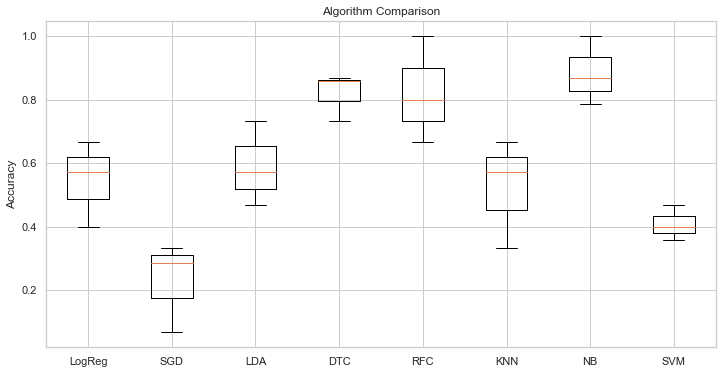

In [28]:
plt.figure(figsize=(12,6))
plt.boxplot(results_acc, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

- the top 3 models chosen in terms of accuracy score will be DTC, RFC and NB.

In [29]:
# using k-fold of 3 for cross validation due to small dataset
results_pred = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=3, random_state=101, shuffle=True)
    pred_results = cross_val_predict(model, X_train, y_train, cv=skfold)

    results_pred.append(pred_results)
    names.append(name)
    
    print(f'{name}:')
    print(confusion_matrix(y_train, pred_results))
    print(classification_report(y_train, pred_results))

LogReg:
[[7 0 8 0]
 [0 4 0 0]
 [7 0 4 2]
 [1 0 2 9]]
              precision    recall  f1-score   support

           1       0.47      0.47      0.47        15
           2       1.00      1.00      1.00         4
           3       0.29      0.31      0.30        13
           4       0.82      0.75      0.78        12

    accuracy                           0.55        44
   macro avg       0.64      0.63      0.64        44
weighted avg       0.56      0.55      0.55        44

SGD:
[[ 5  0 10  0]
 [ 1  0  3  0]
 [ 4  0  9  0]
 [ 4  0  8  0]]
              precision    recall  f1-score   support

           1       0.36      0.33      0.34        15
           2       0.00      0.00      0.00         4
           3       0.30      0.69      0.42        13
           4       0.00      0.00      0.00        12

    accuracy                           0.32        44
   macro avg       0.16      0.26      0.19        44
weighted avg       0.21      0.32      0.24        44

LDA:
[[9 0 

- the top 3 models in based from the confusion matrix and precision and recall score are DTC, RFC and NB.
- based on these results, RFC, NB and KNN will be chosen for further evaluation by tuning their parameters.

## Parameter Tuning

### RFC

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'n_estimators': [1, 10, 100], 
              'max_depth': [1, 10, 100], 
              'min_samples_split': [0.1, 1, 10], 
              'min_samples_leaf': [0.1, 1, 10], 
              'max_features': [n for n in range(1,3)]}

skfold = StratifiedKFold(n_splits=3, random_state=101, shuffle=True)

grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [1, 10, 100], 'max_features': [1, 2],
                         'min_samples_leaf': [0.1, 1, 10],
                         'min_samples_split': [0.1, 1, 10],
                         'n_estimators': [1, 10, 100]},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [32]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1,
 'n_estimators': 1}

In [33]:
grid_search.best_score_

0.8735704110704111

- the parameter **min_samples_split** chosen is the lowest value, this means there might be lower value that is better.

In [34]:
param_grid = {'n_estimators': [1, 10, 100], 
              'max_depth': [1, 10, 100], 
              'min_samples_split': [0.1, 1, 10], 
              'min_samples_leaf': [0.001, 0.01, 0.1], 
              'max_features': [n for n in range(1,3)]}

skfold = StratifiedKFold(n_splits=3, random_state=101, shuffle=True)

grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [1, 10, 100], 'max_features': [1, 2],
                         'min_samples_leaf': [0.001, 0.01, 0.1],
                         'min_samples_split': [0.1, 1, 10],
                         'n_estimators': [1, 10, 100]},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [35]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 1,
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.1,
 'n_estimators': 1}

In [36]:
grid_search.best_score_

0.8735704110704111

- the parameter **min_samples_split** still choose the lowest value but there's not much difference made in terms of the f1 score, so we will leave it at that.

### KNN

In [37]:
# find k with cv
error_rate = []

for n in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=n)
    pred_n = cross_val_predict(knn, X_train, y_train, cv=skfold)
    error_rate.append(np.mean(pred_n != y_train))

Text(0, 0.5, 'Error Rate')

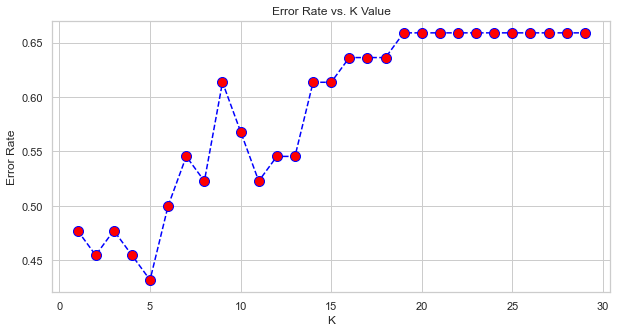

In [38]:
plt.figure(figsize=(10,5))

plt.plot(range(1,30),
         error_rate,color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

- the least error looks like it's when k = 5.

In [39]:
param_grid = {'n_neighbors':[n for n in range(1,11)]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [40]:
grid_search.best_params_

{'n_neighbors': 4}

In [41]:
grid_search.best_score_

0.6210571835571835

In [42]:
cv_results = pd.DataFrame(grid_search.cv_results_)

cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'mean_test_accuracy',
       'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy',
       'split1_train_accuracy', 'split2_train_accuracy', 'mean_train_accuracy',
       'std_train_accuracy', 'split0_test_f1_macro', 'split1_test_f1_macro',
       'split2_test_f1_macro', 'mean_test_f1_macro', 'std_test_f1_macro',
       'rank_test_f1_macro', 'split0_train_f1_macro', 'split1_train_f1_macro',
       'split2_train_f1_macro', 'mean_train_f1_macro', 'std_train_f1_macro'],
      dtype='object')

In [43]:
metrics_mean = ['param_n_neighbors','mean_train_accuracy','mean_test_accuracy','mean_train_f1_macro','mean_test_f1_macro']

cv_results_mean = cv_results[metrics_mean]

display(cv_results_mean.T)

,0,1,2,3,4,5,6,7,8,9
param_n_neighbors,1,2,3,4,5,6,7,8,9,10
mean_train_accuracy,1,0.784291,0.795402,0.76092,0.69272,0.681992,0.637165,0.591188,0.556705,0.522605
mean_test_accuracy,0.52381,0.544444,0.522222,0.546032,0.566667,0.5,0.453968,0.47619,0.387302,0.433333
mean_train_f1_macro,1,0.808266,0.826762,0.790771,0.673252,0.653352,0.476826,0.451051,0.408786,0.366101
mean_test_f1_macro,0.60597,0.616597,0.60335,0.621057,0.588724,0.515898,0.334351,0.35058,0.286996,0.288492


- the best k is 4, but the f1 score and accuracy score are still not better.

### RFC vs NB

In [44]:
chosen_models = []

chosen_models.append(('RFC', RandomForestClassifier(max_depth=10, max_features=1, min_samples_leaf=0.001,
                                                    min_samples_split=0.1, n_estimators=1,
                                                    random_state=101)))
chosen_models.append(('NB', GaussianNB()))

RFC: 0.8444444444444444 (0.13698697784375505)
NB: 0.8841269841269841 (0.08834869873063966)


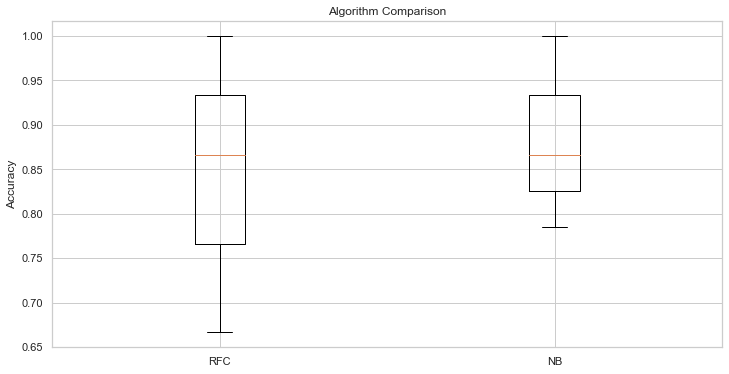

In [45]:
results_acc = []
names = []

for name, model in chosen_models:
    skfold = StratifiedKFold(n_splits=3, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')

    results_acc.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

    
plt.figure(figsize=(12,6))
plt.boxplot(results_acc, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

In [46]:
results_pred = []
names = []

for name, model in chosen_models:
    skfold = StratifiedKFold(n_splits=3, random_state=101, shuffle=True)
    pred_results = cross_val_predict(model, X_train, y_train, cv=skfold)

    results_pred.append(pred_results)
    names.append(name)
    
    print(f'{name}:')
    print(confusion_matrix(y_train, pred_results))
    print(classification_report(y_train, pred_results))

RFC:
[[12  0  2  1]
 [ 0  4  0  0]
 [ 0  0 11  2]
 [ 0  0  2 10]]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        15
           2       1.00      1.00      1.00         4
           3       0.73      0.85      0.79        13
           4       0.77      0.83      0.80        12

    accuracy                           0.84        44
   macro avg       0.88      0.87      0.87        44
weighted avg       0.86      0.84      0.84        44

NB:
[[15  0  0  0]
 [ 0  4  0  0]
 [ 3  0  9  1]
 [ 0  0  1 11]]
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        15
           2       1.00      1.00      1.00         4
           3       0.90      0.69      0.78        13
           4       0.92      0.92      0.92        12

    accuracy                           0.89        44
   macro avg       0.91      0.90      0.90        44
weighted avg       0.89      0.89      0.88        44


- if precision is priorities RFC is a better choice, if recall is priorities NB is a better choice but overall NB performs the best.

## Evaluate on Test Set

In [48]:
nb = GaussianNB()

nb.fit(X_train, y_train)

pred = nb.predict(X_test)

print(f'Training score: {nb.score(X_train, y_train)}')
print(f'Test score: {nb.score(X_test, y_test)}')

Training score: 0.9318181818181818
Test score: 0.9166666666666666


In [51]:
con_mat = confusion_matrix(y_test, pred)

print(con_mat)
print(classification_report(y_test,pred))

[[4 0 0 0]
 [0 1 0 0]
 [1 0 2 0]
 [0 0 0 4]]
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         4

    accuracy                           0.92        12
   macro avg       0.95      0.92      0.92        12
weighted avg       0.93      0.92      0.91        12



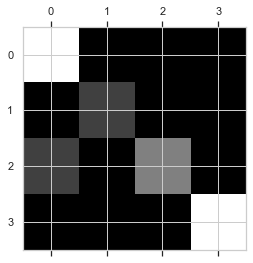

In [53]:
plt.matshow(con_mat, cmap=plt.cm.gray)
plt.show()

- the model is able to predict well on apple(0), mandarin(1) and lemon(2).
- the model also misclassified one as an apple.

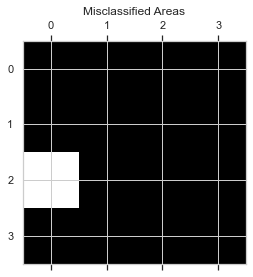

In [57]:
row_sums = con_mat.sum(axis=1, keepdims=True)
norm_con_mat = con_mat / row_sums

np.fill_diagonal(norm_con_mat, 0)
plt.matshow(norm_con_mat, cmap=plt.cm.gray)

plt.title('Misclassified Areas')
plt.show()

- in this, most fruit are misclassified as an apple.